# Captioning images from C&C collection

# Install requirements

In [30]:
# install requirements
%pip install -qU pip
%pip install -qU transformers
%pip install -qU langchain
%pip install -qU langchain-community
%pip install -qU langchain-openai
%pip install -qU langchain-ollama
%pip install -qU langchain-chroma
%pip install -qU langchainhub
%pip install -qU langsmith
%pip install -qU python_dotenv
%pip install -qU pillow
%pip install -qU torch
%pip install -qU jupyter
%pip install -qU ipywidgets
%pip install -qU pandas
%pip install -qU "unstructured[all-docs]"
%pip install -qU openai
%pip install -qU pydantic

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.66.1 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.5 which is incompatible.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated p

In [27]:
# import packages and load ENV VARS
import pandas as pd
from dotenv import load_dotenv

load_dotenv()  # take environment variables from .env.

# Code of your application, which uses environment variables (e.g. from `os.environ` or
# `os.getenv`) as if they came from the actual environment.

True

In [12]:
cc_df = pd.read_csv('data/coin_and_conscience_data.csv')
cc_augmented_df = pd.read_csv('data/coin_and_conscience_data_augmented.csv')
caption_df = pd.read_csv('data/caption.csv')
image_df = pd.read_csv('data/image.csv')
metadata_df = pd.read_csv('data/metadata.csv')
results_df = pd.read_csv('data/results.csv')
full_df = pd.read_csv('data/full_metadata.csv')
cc_listed_deduped = pd.read_csv('data/cc_listed_deduped.csv')

In [225]:
cc_df

,artist_name,related_work,title,url,redirect_url,artist_info,print_info,description,topic
0,"Galle, Joannes",1,The Unhappy Lot of the Rich,http://nrs.harvard.edu/urn-3:HBS.BAKER:836612?...,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Phillip Galle (1537–1612), after ...",17.1 x 23.2 cmCF b10,Plate one of his series of six engravings afte...,Vanity and Virtue
1,"Galle, Philip",1,The Unhappy Lot of the Rich,http://nrs.harvard.edu/urn-3:HBS.BAKER:836612?...,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Phillip Galle (1537–1612), after ...",17.1 x 23.2 cmCF b10,Plate one of his series of six engravings afte...,Vanity and Virtue
2,"Heemskerck, Maarten van",1,The Unhappy Lot of the Rich,http://nrs.harvard.edu/urn-3:HBS.BAKER:836612?...,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Phillip Galle (1537–1612), after ...",17.1 x 23.2 cmCF b10,Plate one of his series of six engravings afte...,Vanity and Virtue
3,"Cort, Cornelis",10,Justice Rewards Toil,http://nrs.harvard.edu/urn-3:HBS.BAKER:836621?...,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Cornelis Cort (1533–78), after Fe...",26.5 x 31.5 cmCF i1 xx,"Justice, holding scales in one hand, offers ri...",Vanity and Virtue
4,"Lafreri, Anton",10,Justice Rewards Toil,http://nrs.harvard.edu/urn-3:HBS.BAKER:836621?...,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Cornelis Cort (1533–78), after Fe...",26.5 x 31.5 cmCF i1 xx,"Justice, holding scales in one hand, offers ri...",Vanity and Virtue
...,...,...,...,...,...,...,...,...,...
113,"Cock, Hieronymu",8,The Two Deaths,http://nrs.harvard.edu/urn-3:HBS.BAKER:836619?...,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Hieronymus Wierx (1553–1619), aft...","29.8 x 32.5 cm, imageCF b9 xxx","A narrative in two parts. At left, a pious man...",Vanity and Virtue
114,"Vos, Marten de",8,The Two Deaths,http://nrs.harvard.edu/urn-3:HBS.BAKER:836619?...,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Hieronymus Wierx (1553–1619), aft...","29.8 x 32.5 cm, imageCF b9 xxx","A narrative in two parts. At left, a pious man...",Vanity and Virtue
115,"Wierx, Hieronymus",8,The Two Deaths,http://nrs.harvard.edu/urn-3:HBS.BAKER:836619?...,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Hieronymus Wierx (1553–1619), aft...","29.8 x 32.5 cm, imageCF b9 xxx","A narrative in two parts. At left, a pious man...",Vanity and Virtue
116,"Sadeler, Raphael, I",9,Honor,http://nrs.harvard.edu/urn-3:HBS.BAKER:836620?...,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Raphael Sadeler I (1560–1628), af...","22 x 25 cm, imageCF b8 x",Plate three from his series of four allegorica...,Vanity and Virtue


In [226]:
cc_augmented_df

,artist_name,artist_wikidata_uri,related_work,title,url,redirect_url,artist_info,print_info,description,topic
0,"Galle, Joannes",http://www.wikidata.org/entity/Q12058270,1,The Unhappy Lot of the Rich,http://nrs.harvard.edu/urn-3:HBS.BAKER:836612?...,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Phillip Galle (1537–1612), after ...",17.1 x 23.2 cmCF b10,Plate one of his series of six engravings afte...,Vanity and Virtue
1,"Galle, Philip",http://www.wikidata.org/entity/Q1379395,1,The Unhappy Lot of the Rich,http://nrs.harvard.edu/urn-3:HBS.BAKER:836612?...,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Phillip Galle (1537–1612), after ...",17.1 x 23.2 cmCF b10,Plate one of his series of six engravings afte...,Vanity and Virtue
2,"Heemskerck, Maarten van",http://www.wikidata.org/entity/Q538350,1,The Unhappy Lot of the Rich,http://nrs.harvard.edu/urn-3:HBS.BAKER:836612?...,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Phillip Galle (1537–1612), after ...",17.1 x 23.2 cmCF b10,Plate one of his series of six engravings afte...,Vanity and Virtue
3,"Cort, Cornelis",http://www.wikidata.org/entity/Q167220,10,Justice Rewards Toil,http://nrs.harvard.edu/urn-3:HBS.BAKER:836621?...,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Cornelis Cort (1533–78), after Fe...",26.5 x 31.5 cmCF i1 xx,"Justice, holding scales in one hand, offers ri...",Vanity and Virtue
4,"Lafreri, Anton",http://www.wikidata.org/entity/Q602742,10,Justice Rewards Toil,http://nrs.harvard.edu/urn-3:HBS.BAKER:836621?...,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Cornelis Cort (1533–78), after Fe...",26.5 x 31.5 cmCF i1 xx,"Justice, holding scales in one hand, offers ri...",Vanity and Virtue
...,...,...,...,...,...,...,...,...,...,...
113,"Cock, Hieronymu",http://www.wikidata.org/entity/Q640361,8,The Two Deaths,http://nrs.harvard.edu/urn-3:HBS.BAKER:836619?...,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Hieronymus Wierx (1553–1619), aft...","29.8 x 32.5 cm, imageCF b9 xxx","A narrative in two parts. At left, a pious man...",Vanity and Virtue
114,"Vos, Marten de",http://www.wikidata.org/entity/Q555022,8,The Two Deaths,http://nrs.harvard.edu/urn-3:HBS.BAKER:836619?...,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Hieronymus Wierx (1553–1619), aft...","29.8 x 32.5 cm, imageCF b9 xxx","A narrative in two parts. At left, a pious man...",Vanity and Virtue
115,"Wierx, Hieronymus",http://www.wikidata.org/entity/Q2778104,8,The Two Deaths,http://nrs.harvard.edu/urn-3:HBS.BAKER:836619?...,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Hieronymus Wierx (1553–1619), aft...","29.8 x 32.5 cm, imageCF b9 xxx","A narrative in two parts. At left, a pious man...",Vanity and Virtue
116,"Sadeler, Raphael, I",http://www.wikidata.org/entity/Q19569785,9,Honor,http://nrs.harvard.edu/urn-3:HBS.BAKER:836620?...,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Raphael Sadeler I (1560–1628), af...","22 x 25 cm, imageCF b8 x",Plate three from his series of four allegorica...,Vanity and Virtue


In [228]:
cc_listed_df = cc_augmented_df.groupby("url").agg(lambda x: list(set(x))).reset_index()
cc_listed_df

,url,artist_name,artist_wikidata_uri,related_work,title,redirect_url,artist_info,print_info,description,topic
0,http://nrs.harvard.edu/urn-3:HBS.BAKER:836612?...,"[Heemskerck, Maarten van, Galle, Philip, Galle...","[http://www.wikidata.org/entity/Q12058270, htt...",[1],[The Unhappy Lot of the Rich],[https://iiif.lib.harvard.edu/manifests/view/i...,"[Engraving by Phillip Galle (1537–1612), after...",[17.1 x 23.2 cmCF b10],[Plate one of his series of six engravings aft...,[Vanity and Virtue]
1,http://nrs.harvard.edu/urn-3:HBS.BAKER:836613?...,"[Heemskerck, Maarten van, Galle, Philip]","[http://www.wikidata.org/entity/Q538350, http:...",[2],[The Unhappy Lot of the Rich],[https://iiif.lib.harvard.edu/manifests/view/i...,"[Engraving by Philip Galle (1537–1612), after ...",[17 x 23 cmCF b11],[First state. Plate four of his series of six ...,[Vanity and Virtue]
2,http://nrs.harvard.edu/urn-3:HBS.BAKER:836614?...,"[Cock, Hieronymu, Heemskerck, Maarten van, Coo...","[http://www.wikidata.org/entity/Q538350, http:...",[3],[The Triumph of Riches],[https://iiif.lib.harvard.edu/manifests/view/i...,[Engraving by Dirck Volkertsz. Coornhert (1519...,[22.2 x 29.4 cmCF b5 xx],[First state. Plate two of the series of eight...,[Vanity and Virtue]
3,http://nrs.harvard.edu/urn-3:HBS.BAKER:836615?...,"[Stradanus, Johannes, Galle, Philip]","[http://www.wikidata.org/entity/Q143595, http:...",[4],[An Allegorical Hunt],[https://iiif.lib.harvard.edu/manifests/view/i...,[Engraved and published by Philip Galle (1537–...,[21.7 x 24 cm; lower plate mark trimmedCF b3 xx],[Money is chased by a peasant whose hounds are...,[Vanity and Virtue]
4,http://nrs.harvard.edu/urn-3:HBS.BAKER:836616?...,"[Heyden, Pieter van der, Galle, Joannes, Breug...","[http://www.wikidata.org/entity/Q12058270, htt...",[5],[The Fight of the Money-Bags and the Coffers],[https://iiif.lib.harvard.edu/manifests/view/i...,[Engraving by Pieter van der Heyden (fl. 1557)...,[23.7 x 30.4 cmCF b4 xx],[Second state. Caption below image is in Latin...,[Vanity and Virtue]
...,...,...,...,...,...,...,...,...,...,...
65,http://nrs.harvard.edu/urn-3:HBS.BAKER:836679?...,"[Bowles, Thomas]",[http://www.wikidata.org/entity/Q18577046],[68],[A View of the Royal Exchange London. [second ...,[https://iiif.lib.harvard.edu/manifests/view/i...,[Etching and engraving by Thomas Bowles (b. ca...,[26 x 40 cmAE gb2 xxx],[The first Royal Exchange opened in 1567 and w...,[Stock Exchanges]
66,http://nrs.harvard.edu/urn-3:HBS.BAKER:836680?...,"[Auvray, Pierre Laurent, Lespinasse, Louis Nic...","[http://www.wikidata.org/entity/Q53498257, htt...",[69],[Vue de la Bourse et du Magazin des Marchandis...,[https://iiif.lib.harvard.edu/manifests/view/i...,"[Engraving by Pierre Laurent Auvray (b. 1736),...",[24.8 x 35.5 cmAE r1 xx],[Plate from Nicolas Gabriel Leclerc's Histoire...,[Stock Exchanges]
67,http://nrs.harvard.edu/urn-3:HBS.BAKER:836681?...,"[Geissler, Friedrich]",[http://www.wikidata.org/entity/Q19279961],[70],[Die Hamburger Börse. [the old exchange]],[https://iiif.lib.harvard.edu/manifests/view/i...,[Engraving by Friedrich Geissler (1778–1853). ...,"[10.8 x 18.8 cm, imageAE g11 x]",[The earliest exchange in Hamburg opened in 15...,[Stock Exchanges]
68,http://nrs.harvard.edu/urn-3:HBS.BAKER:864093?...,"[Gillray, James]",[http://www.wikidata.org/entity/Q520806],[41],"[Political Ravishment, or the Old Lady of Thre...",[https://iiif.lib.harvard.edu/manifests/view/i...,[Hand-colored etching by James Gillray (1757–1...,"[24.8 x 34 cm, imageDA gb29a xx]",[A man attacks an old woman who wears a dress ...,[Politics and War]


In [229]:
def delist_singles(ls):
    if (type(ls) == list) and (len(ls) == 1):
        ls = ls[0]
        return ls
    else:
        return ls

In [230]:
cc_listed_deduped = cc_listed_df.map(delist_singles)
# cc_listed_deduped.to_csv('data/cc_listed_deduped.csv', index=False)
cc_listed_deduped

,url,artist_name,artist_wikidata_uri,related_work,title,redirect_url,artist_info,print_info,description,topic
0,http://nrs.harvard.edu/urn-3:HBS.BAKER:836612?...,"[Heemskerck, Maarten van, Galle, Philip, Galle...","[http://www.wikidata.org/entity/Q12058270, htt...",1,The Unhappy Lot of the Rich,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Phillip Galle (1537–1612), after ...",17.1 x 23.2 cmCF b10,Plate one of his series of six engravings afte...,Vanity and Virtue
1,http://nrs.harvard.edu/urn-3:HBS.BAKER:836613?...,"[Heemskerck, Maarten van, Galle, Philip]","[http://www.wikidata.org/entity/Q538350, http:...",2,The Unhappy Lot of the Rich,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Philip Galle (1537–1612), after M...",17 x 23 cmCF b11,First state. Plate four of his series of six e...,Vanity and Virtue
2,http://nrs.harvard.edu/urn-3:HBS.BAKER:836614?...,"[Cock, Hieronymu, Heemskerck, Maarten van, Coo...","[http://www.wikidata.org/entity/Q538350, http:...",3,The Triumph of Riches,https://iiif.lib.harvard.edu/manifests/view/id...,Engraving by Dirck Volkertsz. Coornhert (1519–...,22.2 x 29.4 cmCF b5 xx,First state. Plate two of the series of eight ...,Vanity and Virtue
3,http://nrs.harvard.edu/urn-3:HBS.BAKER:836615?...,"[Stradanus, Johannes, Galle, Philip]","[http://www.wikidata.org/entity/Q143595, http:...",4,An Allegorical Hunt,https://iiif.lib.harvard.edu/manifests/view/id...,Engraved and published by Philip Galle (1537–1...,21.7 x 24 cm; lower plate mark trimmedCF b3 xx,Money is chased by a peasant whose hounds are ...,Vanity and Virtue
4,http://nrs.harvard.edu/urn-3:HBS.BAKER:836616?...,"[Heyden, Pieter van der, Galle, Joannes, Breug...","[http://www.wikidata.org/entity/Q12058270, htt...",5,The Fight of the Money-Bags and the Coffers,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Pieter van der Heyden (fl. 1557),...",23.7 x 30.4 cmCF b4 xx,"Second state. Caption below image is in Latin,...",Vanity and Virtue
...,...,...,...,...,...,...,...,...,...,...
65,http://nrs.harvard.edu/urn-3:HBS.BAKER:836679?...,"Bowles, Thomas",http://www.wikidata.org/entity/Q18577046,68,A View of the Royal Exchange London. [second e...,https://iiif.lib.harvard.edu/manifests/view/id...,Etching and engraving by Thomas Bowles (b. ca....,26 x 40 cmAE gb2 xxx,The first Royal Exchange opened in 1567 and wa...,Stock Exchanges
66,http://nrs.harvard.edu/urn-3:HBS.BAKER:836680?...,"[Auvray, Pierre Laurent, Lespinasse, Louis Nic...","[http://www.wikidata.org/entity/Q53498257, htt...",69,Vue de la Bourse et du Magazin des Marchandise...,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Pierre Laurent Auvray (b. 1736), ...",24.8 x 35.5 cmAE r1 xx,Plate from Nicolas Gabriel Leclerc's Histoire ...,Stock Exchanges
67,http://nrs.harvard.edu/urn-3:HBS.BAKER:836681?...,"Geissler, Friedrich",http://www.wikidata.org/entity/Q19279961,70,Die Hamburger Börse. [the old exchange],https://iiif.lib.harvard.edu/manifests/view/id...,Engraving by Friedrich Geissler (1778–1853). [...,"10.8 x 18.8 cm, imageAE g11 x",The earliest exchange in Hamburg opened in 155...,Stock Exchanges
68,http://nrs.harvard.edu/urn-3:HBS.BAKER:864093?...,"Gillray, James",http://www.wikidata.org/entity/Q520806,41,"Political Ravishment, or the Old Lady of Threa...",https://iiif.lib.harvard.edu/manifests/view/id...,Hand-colored etching by James Gillray (1757–18...,"24.8 x 34 cm, imageDA gb29a xx",A man attacks an old woman who wears a dress o...,Politics and War


In [231]:
image_df

,source,detection_class_prob,coordinates,last_modified,filetype,languages,page_number,file_directory,filename,category,element_id,image_id,parent_id,page_content
0,images/3910465.jpg,0.576225,"{'points': ((56.383705139160156, 30.0859451293...",2024-09-05T13:31:59,JPEG,['eng'],1,images,3910465.jpg,Image,729517c31c1fda7fb4b1421e013363e4,7ba74431-d12b-41f8-b376-7f6203e23421,NaN,"RU YM Sie LM a Ye y eae AY) WML tr Y, ip A (2 ..."
1,images/3910465.jpg,NaN,"{'points': ((41.0, 1656.0), (41.0, 1725.0), (1...",2024-09-05T13:31:59,JPEG,['eng'],1,images,3910465.jpg,Title,acde8ea5ea9959cf44cc23b03b82826c,4eb51154-ce39-41d5-af1d-377d24cb1c9a,NaN,",or__ The Old Lady of Thre -RAVISHMENT POLITICAL"
2,images/3910465.jpg,NaN,"{'points': ((1551.0, 1673.0), (1551.0, 1715.0)...",2024-09-05T13:31:59,JPEG,['eng'],1,images,3910465.jpg,Title,0a9c36460e63e77042649cb22fe4fd86,ce008923-7c3c-480d-8c3e-c0b7aae8cb2a,NaN,i
3,images/3910511.jpg,0.768353,"{'points': ((32.92207717895508, 52.47631072998...",2024-09-05T13:32:11,JPEG,['eng'],1,images,3910511.jpg,Image,fb8d7bb70fdcf26ed4a1018c3cf28e39,49f68ac6-b73a-48b5-b13b-9007b845eeb1,NaN,Vullishd according to tityf$a aaa Bugust 2 20....
4,images/3910511.jpg,NaN,"{'points': ((101.0, 1430.0), (101.0, 1526.0), ...",2024-09-05T13:32:11,JPEG,['eng'],1,images,3910511.jpg,Title,4d550873a45fac128e996a52b424464a,1774bd45-dace-4987-9717-d2ea1560dee2,NaN,"Pe Ly, View of t Me Kioyal Carituange"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,images/3910535.jpg,NaN,"{'points': ((1137.5757575757577, 1762.72727272...",2024-09-05T13:31:41,JPEG,['eng'],1,images,3910535.jpg,Title,18c88d6963df67ecd235f79dd1fa046a,f1799062-43f1-4d0d-8185-7298c5f8ed4e,NaN,§ cognitus
436,images/3910535.jpg,NaN,"{'points': ((1388.7878787878788, 1769.09090909...",2024-09-05T13:31:41,JPEG,['eng'],1,images,3910535.jpg,Title,0285e11edd2e54a702086af8a0cacad7,1cf1ccec-1131-4f50-b641-50b4c645a8e3,NaN,Vjus
437,images/3910535.jpg,NaN,"{'points': ((1527.5757575757577, 1767.87878787...",2024-09-05T13:31:41,JPEG,['eng'],1,images,3910535.jpg,Title,e6458223e6e8c0ad70e13f92afcf2ca7,4341a2b8-f249-48d7-a0e9-bd795de18a6b,NaN,Pull: OO
438,images/3910535.jpg,NaN,"{'points': ((1656.969696969697, 1781.212121212...",2024-09-05T13:31:41,JPEG,['eng'],1,images,3910535.jpg,Title,62dac22f6bb51a3ece4fd0fbe5cef94c,9968dbf0-8a9e-4944-aff2-e1465a951606,NaN,eA


In [239]:
metadata_df.columns= metadata_df.columns.str.lower()
metadata_df

,title,author / creator,edition,description,notes,subjects,form / genre,culture,identifier,related work,...,copyright,repository,includes layers,collection,creation date,hollis number,permalink,source,image id,permalink.1
0,[The Apostles Distribute the Money to those in...,"Sadeler, Jan, 1550-1600, Flemish [engraver];Vo...",NaN,Depicts the Apostles distributing bags of mone...,NaN,Biblical events ; apostles ; money ; poor ; mo...,engravings,NaN,Coin and Conscience catalog 30,"part of Bleichroeder Print Collection, Kress C...",...,NaN,Baker Library Special Collections and Archives...,NaN,NaN,ca. 1600,olvwork308286,"<a href=""http://id.lib.harvard.edu/via/olvwork...",HVD - Images,4087846,https://hollis.harvard.edu/primo-explore/fulld...
1,[The Fight of the Money-Bags and the Coffers],"Heyden, Pieter van der, 1530-1575, Dutch [engr...",Second state.,"Caption below image is in Latin, French and Du...",NaN,allegories ; personification ; money ; coin ho...,engravings,NaN,Coin and Conscience catalog 5,"part of Bleichroeder Print Collection, Kress C...",...,NaN,Baker Library Special Collections and Archives...,NaN,NaN,1558?,olvwork308229,"<a href=""http://id.lib.harvard.edu/via/olvwork...",HVD - Images,4087625,https://hollis.harvard.edu/primo-explore/fulld...
2,[Peasant with Coins],"Hess, Carl Ernst Christoph, 1755-1828, German ...",NaN,"Below image: ""Aus der Sammlung des Canonicus S...",NaN,peasants ; coins ; coin hoards ; hats ; male f...,engravings,NaN,Coin and Conscience catalog 17,"part of Bleichroeder Print Collection, Kress C...",...,NaN,Baker Library Special Collections and Archives...,NaN,NaN,18th century,olvwork308270,"<a href=""http://id.lib.harvard.edu/via/olvwork...",HVD - Images,4089365,https://hollis.harvard.edu/primo-explore/fulld...
3,[Justice Rewards Toil],"Cort, Cornelis, 1533-before 1578, Flemish [eng...",NaN,"Justice, holding scales in one hand, offers ri...",NaN,allegories ; personification ; scales (weighin...,engravings,NaN,Coin and Conscience catalog 10,"part of Bleichroeder Print Collection, Kress C...",...,NaN,Baker Library Special Collections and Archives...,NaN,NaN,1566,olvwork308262,"<a href=""http://id.lib.harvard.edu/via/olvwork...",HVD - Images,4088687,https://hollis.harvard.edu/primo-explore/fulld...
4,J'ai Perdue!,"Roehn, Adolphe Eugene Gabriel, 1780-1867, Fren...",NaN,"A poor, pregnant woman with three small childr...",NaN,mothers ; poverty ; lotteries ; children ; pre...,engravings,NaN,Coin and Conscience catalog 59,"part of Bleichroeder Print Collection, Kress C...",...,NaN,Baker Library Special Collections and Archives...,NaN,NaN,1824,olvwork308321,"<a href=""http://id.lib.harvard.edu/via/olvwork...",HVD - Images,4087410,https://hollis.harvard.edu/primo-explore/fulld...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,John Law (1671-1729).,"Schenck, Pieter, 1660-ca.1718, Dutch [engraver...",NaN,A Scottish financier who became Controller Gen...,NaN,portraits ; male figures ; garden landscapes ;...,engravings,NaN,Coin and Conscience catalog 64,"part of Bleichroeder Print Collection, Kress C...",...,NaN,Baker Library Special Collections and Archives...,NaN,NaN,ca. 1719,olvwork308326,"<a href=""http://id.lib.harvard.edu/via/olvwork...",HVD - Images,4085494,https://hollis.harvard.edu/primo-explore/fulld...
66,"Political Ravishment, or the Old Lady of Threa...","Gillray, James, 1757-1815, English [etcher]",NaN,Hand-colored etching. Published by H. Humphrey...,NaN,caricatures ; paper money ; coins ; dresses ; ...,etchings,British,Coin and Conscience catalog 41,"part of Bleichroeder Print Collection, Kress C...",...,NaN,Baker Library Special Collections and Archives...,NaN,NaN,1797,olvwork309776,"<a href=""http://id.lib.harvard.edu/via/olvwork...",HVD - Images,4089783,https://hollis.harvard.edu/primo-explore/fulld...
67,"Die Wind Kauffer, werden mit Wind bezahlt, und...",NaN,NaN,A rare German version of one of the seventy-fo...,NaN,stock exchanges ; stockbrokers

In [247]:
cc_listed_deduped['description'] = cc_listed_deduped['description'].astype(str)
metadata_df['description'] = metadata_df['description'].astype(str)
join_df = pd.merge(cc_listed_deduped, metadata_df, on="description", how="outer")
join_df

,url,artist_name,artist_wikidata_uri,related_work,title_x,redirect_url,artist_info,print_info,description,topic,...,copyright,repository,includes layers,collection,creation date,hollis number,permalink,source,image id,permalink.1
0,http://nrs.harvard.edu/urn-3:HBS.BAKER:836659?...,NaN,NaN,48.0,Caricature of Louis-Philippe,https://iiif.lib.harvard.edu/manifests/view/id...,"Lithograph by unknown artist. [Paris], Chez Lo...",24 x 18.5 cmDA f23 x,"""Crowned by the Academy of Overripe Pears."" Th...",Louis-Philippe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://nrs.harvard.edu/urn-3:HBS.BAKER:836651?...,"[Mieris, Frans van, Mesnil (Ménil), Élie]","[http://www.wikidata.org/entity/Q53504581, htt...",40.0,La Double Tentation,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Élie Mesnil (or Ménil, b. 1726), ...",35.5 x 27.5 cmCA f2 xx,"""Gravé d'apres le tableau original de même gra...",Love and Money,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Gravé d'apres le tableau original de même gra...",NaN,...,NaN,Baker Library Special Collections and Archives...,NaN,NaN,18th century,olvwork308300,"<a href=""http://id.lib.harvard.edu/via/olvwork...",HVD - Images,4084769.0,https://hollis.harvard.edu/primo-explore/fulld...
3,http://nrs.harvard.edu/urn-3:HBS.BAKER:836675?...,"[Schenk, Pieter, Schenk, Leonard]","[http://www.wikidata.org/entity/Q78163, http:/...",64.0,John Law (1671–1729),https://iiif.lib.harvard.edu/manifests/view/id...,Engraving by Leonard Schenk (fl. 1715–46). Pie...,27.5 x 18 cmF f30 x,A Scottish financier who became Controller Gen...,"Bankers, Financiers, and Statesmen",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A Scottish financier who became Controller Gen...,NaN,...,NaN,Baker Library Special Collections and Archives...,NaN,NaN,ca. 1719,olvwork308326,"<a href=""http://id.lib.harvard.edu/via/olvwork...",HVD - Images,4085494.0,https://hollis.harvard.edu/primo-explore/fulld...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,http://nrs.harvard.edu/urn-3:HBS.BAKER:836624?...,"[Swanenburgh, Willem Isaakz, I, Razet, J., Blo...","[http://www.wikidata.org/entity/Q21531043, htt...",13.0,Allegory of the Vanity and Transitory Nature o...,https://iiif.lib.harvard.edu/manifests/view/id...,Engraving by Willem Isaakz Swanenburgh I (1581...,"26 x 18.5 cm, imageCF n1","This is a later state, with J. Razet's address...",Vanity and Virtue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"This is a later state, with J. Razet's address...",NaN,...,NaN,Baker Library Special Collections and Archives...,NaN,NaN,1608,olvwork308266,"<a href=""http://id.lib.harvard.edu/via/olvwork...",HVD - Images,4087224.0,https://hollis.harvard.edu/primo-explore/fulld...
137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uytenbogaert was the Receiver General in Amste...,NaN,...,NaN,Baker Library Special Collections and Archives...,NaN,NaN,1639,olvwork308268,"<a href=""http://id.lib.harvard.edu/via/olvwork...",HVD - Images,4086304.0,https://hollis.harvard.edu/primo-explore/fulld...
138,http://nrs.harvard.edu/urn-3:HBS.BAKER:836641?...,"[Vos, Marten de, Sadeler, Jan (Johannes), I]","[http://www.wikidata.org/entity/Q3161745, http...",30.0,The Apostles Distribute the Money to those in ...,https://iiif.lib.harvard.edu/manifests/view/id...,Engraving by Jan (Johannes) Sadeler I (1550–16...,"16.5 x 23.8 cm, imageCC b1",nan,Biblical and Mythological Scenes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
caption_df

,image_path,caption_id,caption_text
0,images/3910511.jpg,4bde0737-f255-4a68-b57a-497321b99c64,an image of a city street with a horse drawn [...
1,images/3910539.jpg,be50790a-d58e-4780-a8b4-b07576a8ecb5,an image of a group of people in a courtyard [...
2,images/3910471.jpg,c3dde9af-acc5-4f87-b26c-e9a83e4bddde,an image of a man in a coat and hat [SEP]
3,images/3910465.jpg,959f2724-57c1-49d7-ba06-90648de460a2,an image of a cartoon of a man and woman [SEP]
4,images/3910459.jpg,9ea540da-eb9b-4f06-aedc-8943e9f5cce6,an image of a nude woman lying on a bed [SEP]
...,...,...,...
65,images/3910521.jpg,b29d8367-8ffc-4723-b4b5-a3c977922af5,an image of a man being taken from a manger [SEP]
66,images/3910535.jpg,c2eb6a58-7b63-4f24-9960-318a4d1d1bf1,an image of a man in a suit and hat [SEP]
67,images/3910469.jpg,2f72c100-cd7b-47c1-995b-6a5ac64cf7d5,an image of a city with a clock tower [SEP]
68,images/3910455.jpg,142476fa-a210-43de-9295-09056260dd42,an image of two men standing next to each othe...


In [28]:
results_df

,image_description,people_count,main_objects
0,An 18th-century engraving depicting the Royal ...,50,"['Royal Exchange building', 'horse-drawn carri..."


In [133]:
join_df = caption_df.join(metadata_df)
# full_df = pd.merge(cc_listed_deduped, join_df, how="left",on="description")
# full_df = join_df
join_df

,image_path,caption_id,caption_text,Title,Author / Creator,Edition,Description,Notes,Subjects,Form / genre,...,Copyright,Repository,Includes layers,Collection,Creation Date,HOLLIS number,Permalink,Source,Image ID,Permalink.1
0,images/3910511.jpg,4bde0737-f255-4a68-b57a-497321b99c64,an image of a city street with a horse drawn [...,[The Apostles Distribute the Money to those in...,"Sadeler, Jan, 1550-1600, Flemish [engraver];Vo...",NaN,Depicts the Apostles distributing bags of mone...,NaN,Biblical events ; apostles ; money ; poor ; mo...,engravings,...,NaN,Baker Library Special Collections and Archives...,NaN,NaN,ca. 1600,olvwork308286,"<a href=""http://id.lib.harvard.edu/via/olvwork...",HVD - Images,4087846,https://hollis.harvard.edu/primo-explore/fulld...
1,images/3910539.jpg,be50790a-d58e-4780-a8b4-b07576a8ecb5,an image of a group of people in a courtyard [...,[The Fight of the Money-Bags and the Coffers],"Heyden, Pieter van der, 1530-1575, Dutch [engr...",Second state.,"Caption below image is in Latin, French and Du...",NaN,allegories ; personification ; money ; coin ho...,engravings,...,NaN,Baker Library Special Collections and Archives...,NaN,NaN,1558?,olvwork308229,"<a href=""http://id.lib.harvard.edu/via/olvwork...",HVD - Images,4087625,https://hollis.harvard.edu/primo-explore/fulld...
2,images/3910471.jpg,c3dde9af-acc5-4f87-b26c-e9a83e4bddde,an image of a man in a coat and hat [SEP],[Peasant with Coins],"Hess, Carl Ernst Christoph, 1755-1828, German ...",NaN,"Below image: ""Aus der Sammlung des Canonicus S...",NaN,peasants ; coins ; coin hoards ; hats ; male f...,engravings,...,NaN,Baker Library Special Collections and Archives...,NaN,NaN,18th century,olvwork308270,"<a href=""http://id.lib.harvard.edu/via/olvwork...",HVD - Images,4089365,https://hollis.harvard.edu/primo-explore/fulld...
3,images/3910465.jpg,959f2724-57c1-49d7-ba06-90648de460a2,an image of a cartoon of a man and woman [SEP],[Justice Rewards Toil],"Cort, Cornelis, 1533-before 1578, Flemish [eng...",NaN,"Justice, holding scales in one hand, offers ri...",NaN,allegories ; personification ; scales (weighin...,engravings,...,NaN,Baker Library Special Collections and Archives...,NaN,NaN,1566,olvwork308262,"<a href=""http://id.lib.harvard.edu/via/olvwork...",HVD - Images,4088687,https://hollis.harvard.edu/primo-explore/fulld...
4,images/3910459.jpg,9ea540da-eb9b-4f06-aedc-8943e9f5cce6,an image of a nude woman lying on a bed [SEP],J'ai Perdue!,"Roehn, Adolphe Eugene Gabriel, 1780-1867, Fren...",NaN,"A poor, pregnant woman with three small childr...",NaN,mothers ; poverty ; lotteries ; children ; pre...,engravings,...,NaN,Baker Library Special Collections and Archives...,NaN,NaN,1824,olvwork308321,"<a href=""http://id.lib.harvard.edu/via/olvwork...",HVD - Images,4087410,https://hollis.harvard.edu/primo-explore/fulld...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,images/3910521.jpg,b29d8367-8ffc-4723-b4b5-a3c977922af5,an image of a man being taken from a manger [SEP],John Law (1671-1729).,"Schenck, Pieter, 1660-ca.1718, Dutch [engraver...",NaN,A Scottish financier who became Controller Gen...,NaN,portraits ; male figures ; garden landscapes ;...,engravings,...,NaN,Baker Library Special Collections and Archives...,NaN,NaN,ca. 1719,olvwork308326,"<a href=""http://id.lib.harvard.edu/via/olvwork...",HVD - Images,4085494,https://hollis.harvard.edu/primo-explore/fulld...
66,images/3910535.jpg,c2eb6a58-7b63-4f24-9960-318a4d1d1bf1,an image of a man in a suit and hat [SEP],"Political Ravishment, or the Old Lady of Threa...","Gillray, James, 1757-1815, English [etcher]",NaN,Hand-colored etching. Published by H. Humphrey...,NaN,caricatures ; paper money ; coins ; dresses ; ...,etchings,...,NaN,Baker Library Special Collections and Archives...,NaN,NaN,1797,olvwork309776,"<a href=""http://id.lib.harvard.edu/via/olvwork...",HVD - Images,4089783,https://hollis.harvard.edu/primo-explore/fulld...
67,images/3910469.jpg,2f72c100-cd7b-4

In [122]:
full_df

,index,image_path,caption_id,caption_text,Title,Author / Creator,Edition,Description,Notes,Subjects,...,url,artist_name,artist_wikidata_uri,related_work,title,redirect_url,artist_info,print_info,description,topic
0,0,images/3910511.jpg,4bde0737-f255-4a68-b57a-497321b99c64,an image of a city street with a horse drawn [...,[The Apostles Distribute the Money to those in...,"Sadeler, Jan, 1550-1600, Flemish [engraver];Vo...",NaN,Depicts the Apostles distributing bags of mone...,NaN,Biblical events ; apostles ; money ; poor ; mo...,...,http://nrs.harvard.edu/urn-3:HBS.BAKER:836612?...,"[Heemskerck, Maarten van, Galle, Philip, Galle...","[http://www.wikidata.org/entity/Q12058270, htt...",1,The Unhappy Lot of the Rich,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Phillip Galle (1537–1612), after ...",17.1 x 23.2 cmCF b10,Plate one of his series of six engravings afte...,Vanity and Virtue
1,1,images/3910539.jpg,be50790a-d58e-4780-a8b4-b07576a8ecb5,an image of a group of people in a courtyard [...,[The Fight of the Money-Bags and the Coffers],"Heyden, Pieter van der, 1530-1575, Dutch [engr...",Second state.,"Caption below image is in Latin, French and Du...",NaN,allegories ; personification ; money ; coin ho...,...,http://nrs.harvard.edu/urn-3:HBS.BAKER:836613?...,"[Heemskerck, Maarten van, Galle, Philip]","[http://www.wikidata.org/entity/Q538350, http:...",2,The Unhappy Lot of the Rich,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Philip Galle (1537–1612), after M...",17 x 23 cmCF b11,First state. Plate four of his series of six e...,Vanity and Virtue
2,2,images/3910471.jpg,c3dde9af-acc5-4f87-b26c-e9a83e4bddde,an image of a man in a coat and hat [SEP],[Peasant with Coins],"Hess, Carl Ernst Christoph, 1755-1828, German ...",NaN,"Below image: ""Aus der Sammlung des Canonicus S...",NaN,peasants ; coins ; coin hoards ; hats ; male f...,...,http://nrs.harvard.edu/urn-3:HBS.BAKER:836614?...,"[Cock, Hieronymu, Heemskerck, Maarten van, Coo...","[http://www.wikidata.org/entity/Q538350, http:...",3,The Triumph of Riches,https://iiif.lib.harvard.edu/manifests/view/id...,Engraving by Dirck Volkertsz. Coornhert (1519–...,22.2 x 29.4 cmCF b5 xx,First state. Plate two of the series of eight ...,Vanity and Virtue
3,3,images/3910465.jpg,959f2724-57c1-49d7-ba06-90648de460a2,an image of a cartoon of a man and woman [SEP],[Justice Rewards Toil],"Cort, Cornelis, 1533-before 1578, Flemish [eng...",NaN,"Justice, holding scales in one hand, offers ri...",NaN,allegories ; personification ; scales (weighin...,...,http://nrs.harvard.edu/urn-3:HBS.BAKER:836615?...,"[Stradanus, Johannes, Galle, Philip]","[http://www.wikidata.org/entity/Q143595, http:...",4,An Allegorical Hunt,https://iiif.lib.harvard.edu/manifests/view/id...,Engraved and published by Philip Galle (1537–1...,21.7 x 24 cm; lower plate mark trimmedCF b3 xx,Money is chased by a peasant whose hounds are ...,Vanity and Virtue
4,4,images/3910459.jpg,9ea540da-eb9b-4f06-aedc-8943e9f5cce6,an image of a nude woman lying on a bed [SEP],J'ai Perdue!,"Roehn, Adolphe Eugene Gabriel, 1780-1867, Fren...",NaN,"A poor, pregnant woman with three small childr...",NaN,mothers ; poverty ; lotteries ; children ; pre...,...,http://nrs.harvard.edu/urn-3:HBS.BAKER:836616?...,"[Heyden, Pieter van der, Galle, Joannes, Breug...","[http://www.wikidata.org/entity/Q12058270, htt...",5,The Fight of the Money-Bags and the Coffers,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Pieter van der Heyden (fl. 1557),...",23.7 x 30.4 cmCF b4 xx,"Second state. Caption below image is in Latin,...",Vanity and Virtue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,65,images/3910521.jpg,b29d8367-8ffc-4723-b4b5-a3c977922af5,an image of a man being taken from a manger [SEP],John Law (1671-1729).,"Schenck, Pieter, 1660-ca.1718, Dutch [engraver...",NaN,A Scottish financier who became Controller Gen...,NaN,portraits ; male figures ; garden landscapes ;...

In [211]:
cc_listed_deduped = cc_listed_deduped.reset_index()
cc_listed_deduped

,url,artist_name,artist_wikidata_uri,related_work,title,redirect_url,artist_info,print_info,description,topic
0,http://nrs.harvard.edu/urn-3:HBS.BAKER:836612?...,"[Heemskerck, Maarten van, Galle, Philip, Galle...","[http://www.wikidata.org/entity/Q12058270, htt...",1,The Unhappy Lot of the Rich,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Phillip Galle (1537–1612), after ...",17.1 x 23.2 cmCF b10,Plate one of his series of six engravings afte...,Vanity and Virtue
1,http://nrs.harvard.edu/urn-3:HBS.BAKER:836613?...,"[Heemskerck, Maarten van, Galle, Philip]","[http://www.wikidata.org/entity/Q538350, http:...",2,The Unhappy Lot of the Rich,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Philip Galle (1537–1612), after M...",17 x 23 cmCF b11,First state. Plate four of his series of six e...,Vanity and Virtue
2,http://nrs.harvard.edu/urn-3:HBS.BAKER:836614?...,"[Cock, Hieronymu, Heemskerck, Maarten van, Coo...","[http://www.wikidata.org/entity/Q538350, http:...",3,The Triumph of Riches,https://iiif.lib.harvard.edu/manifests/view/id...,Engraving by Dirck Volkertsz. Coornhert (1519–...,22.2 x 29.4 cmCF b5 xx,First state. Plate two of the series of eight ...,Vanity and Virtue
3,http://nrs.harvard.edu/urn-3:HBS.BAKER:836615?...,"[Stradanus, Johannes, Galle, Philip]","[http://www.wikidata.org/entity/Q143595, http:...",4,An Allegorical Hunt,https://iiif.lib.harvard.edu/manifests/view/id...,Engraved and published by Philip Galle (1537–1...,21.7 x 24 cm; lower plate mark trimmedCF b3 xx,Money is chased by a peasant whose hounds are ...,Vanity and Virtue
4,http://nrs.harvard.edu/urn-3:HBS.BAKER:836616?...,"[Heyden, Pieter van der, Galle, Joannes, Breug...","[http://www.wikidata.org/entity/Q12058270, htt...",5,The Fight of the Money-Bags and the Coffers,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Pieter van der Heyden (fl. 1557),...",23.7 x 30.4 cmCF b4 xx,"Second state. Caption below image is in Latin,...",Vanity and Virtue
...,...,...,...,...,...,...,...,...,...,...
65,http://nrs.harvard.edu/urn-3:HBS.BAKER:836679?...,"Bowles, Thomas",http://www.wikidata.org/entity/Q18577046,68,A View of the Royal Exchange London. [second e...,https://iiif.lib.harvard.edu/manifests/view/id...,Etching and engraving by Thomas Bowles (b. ca....,26 x 40 cmAE gb2 xxx,The first Royal Exchange opened in 1567 and wa...,Stock Exchanges
66,http://nrs.harvard.edu/urn-3:HBS.BAKER:836680?...,"[Auvray, Pierre Laurent, Lespinasse, Louis Nic...","[http://www.wikidata.org/entity/Q53498257, htt...",69,Vue de la Bourse et du Magazin des Marchandise...,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Pierre Laurent Auvray (b. 1736), ...",24.8 x 35.5 cmAE r1 xx,Plate from Nicolas Gabriel Leclerc's Histoire ...,Stock Exchanges
67,http://nrs.harvard.edu/urn-3:HBS.BAKER:836681?...,"Geissler, Friedrich",http://www.wikidata.org/entity/Q19279961,70,Die Hamburger Börse. [the old exchange],https://iiif.lib.harvard.edu/manifests/view/id...,Engraving by Friedrich Geissler (1778–1853). [...,"10.8 x 18.8 cm, imageAE g11 x",The earliest exchange in Hamburg opened in 155...,Stock Exchanges
68,http://nrs.harvard.edu/urn-3:HBS.BAKER:864093?...,"Gillray, James",http://www.wikidata.org/entity/Q520806,41,"Political Ravishment, or the Old Lady of Threa...",https://iiif.lib.harvard.edu/manifests/view/id...,Hand-colored etching by James Gillray (1757–18...,"24.8 x 34 cm, imageDA gb29a xx",A man attacks an old woman who wears a dress o...,Politics and War


In [199]:
join_df.columns = join_df.columns.str.lower()
join_df["title"] = join_df["title"].apply(str).apply(delist_singles).apply(remove_brackets)
join_df

,image_path,caption_id,caption_text,title,author / creator,edition,description,notes,subjects,form / genre,...,copyright,repository,includes layers,collection,creation date,hollis number,permalink,source,image id,permalink.1
0,images/3910511.jpg,4bde0737-f255-4a68-b57a-497321b99c64,an image of a city street with a horse drawn [...,The Apostles Distribute the Money to those in ...,"Sadeler, Jan, 1550-1600, Flemish [engraver];Vo...",NaN,Depicts the Apostles distributing bags of mone...,NaN,Biblical events ; apostles ; money ; poor ; mo...,engravings,...,NaN,Baker Library Special Collections and Archives...,NaN,NaN,ca. 1600,olvwork308286,"<a href=""http://id.lib.harvard.edu/via/olvwork...",HVD - Images,4087846,https://hollis.harvard.edu/primo-explore/fulld...
1,images/3910539.jpg,be50790a-d58e-4780-a8b4-b07576a8ecb5,an image of a group of people in a courtyard [...,The Fight of the Money-Bags and the Coffers,"Heyden, Pieter van der, 1530-1575, Dutch [engr...",Second state.,"Caption below image is in Latin, French and Du...",NaN,allegories ; personification ; money ; coin ho...,engravings,...,NaN,Baker Library Special Collections and Archives...,NaN,NaN,1558?,olvwork308229,"<a href=""http://id.lib.harvard.edu/via/olvwork...",HVD - Images,4087625,https://hollis.harvard.edu/primo-explore/fulld...
2,images/3910471.jpg,c3dde9af-acc5-4f87-b26c-e9a83e4bddde,an image of a man in a coat and hat [SEP],Peasant with Coins,"Hess, Carl Ernst Christoph, 1755-1828, German ...",NaN,"Below image: ""Aus der Sammlung des Canonicus S...",NaN,peasants ; coins ; coin hoards ; hats ; male f...,engravings,...,NaN,Baker Library Special Collections and Archives...,NaN,NaN,18th century,olvwork308270,"<a href=""http://id.lib.harvard.edu/via/olvwork...",HVD - Images,4089365,https://hollis.harvard.edu/primo-explore/fulld...
3,images/3910465.jpg,959f2724-57c1-49d7-ba06-90648de460a2,an image of a cartoon of a man and woman [SEP],Justice Rewards Toil,"Cort, Cornelis, 1533-before 1578, Flemish [eng...",NaN,"Justice, holding scales in one hand, offers ri...",NaN,allegories ; personification ; scales (weighin...,engravings,...,NaN,Baker Library Special Collections and Archives...,NaN,NaN,1566,olvwork308262,"<a href=""http://id.lib.harvard.edu/via/olvwork...",HVD - Images,4088687,https://hollis.harvard.edu/primo-explore/fulld...
4,images/3910459.jpg,9ea540da-eb9b-4f06-aedc-8943e9f5cce6,an image of a nude woman lying on a bed [SEP],J'ai Perdue!,"Roehn, Adolphe Eugene Gabriel, 1780-1867, Fren...",NaN,"A poor, pregnant woman with three small childr...",NaN,mothers ; poverty ; lotteries ; children ; pre...,engravings,...,NaN,Baker Library Special Collections and Archives...,NaN,NaN,1824,olvwork308321,"<a href=""http://id.lib.harvard.edu/via/olvwork...",HVD - Images,4087410,https://hollis.harvard.edu/primo-explore/fulld...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,images/3910521.jpg,b29d8367-8ffc-4723-b4b5-a3c977922af5,an image of a man being taken from a manger [SEP],John Law (1671-1729).,"Schenck, Pieter, 1660-ca.1718, Dutch [engraver...",NaN,A Scottish financier who became Controller Gen...,NaN,portraits ; male figures ; garden landscapes ;...,engravings,...,NaN,Baker Library Special Collections and Archives...,NaN,NaN,ca. 1719,olvwork308326,"<a href=""http://id.lib.harvard.edu/via/olvwork...",HVD - Images,4085494,https://hollis.harvard.edu/primo-explore/fulld...
66,images/3910535.jpg,c2eb6a58-7b63-4f24-9960-318a4d1d1bf1,an image of a man in a suit and hat [SEP],"Political Ravishment, or the Old Lady of Threa...","Gillray, James, 1757-1815, English [etcher]",NaN,Hand-colored etching. Published by H. Humphrey...,NaN,caricatures ; paper money ; coins ; dresses ; ...,etchings,...,NaN,Baker Library Special Collections and Archives...,NaN,NaN,1797,olvwork309776,"<a href=""http://id.lib.harvard.edu/via/olvwork...",HVD - Images,4089783,https://hollis.harvard.edu/primo-explore/fulld...
67,images/3910469.jpg,2f72c100-cd7b-47c1-99

In [197]:
def remove_brackets(str):
    if (str[0] == '['):
        return str[1:-1]
    else:
        return str

In [171]:
remove_brackets(join_df["title"].get(0))

'The Apostles Distribute the Money to those in Need. Acts 4: 32-35'

In [184]:
cc_listed_deduped = cc_listed_deduped.reset_index()

,url,artist_name,artist_wikidata_uri,related_work,title,redirect_url,artist_info,print_info,description,topic
0,http://nrs.harvard.edu/urn-3:HBS.BAKER:836612?...,"[Heemskerck, Maarten van, Galle, Philip, Galle...","[http://www.wikidata.org/entity/Q12058270, htt...",1,The Unhappy Lot of the Rich,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Phillip Galle (1537–1612), after ...",17.1 x 23.2 cmCF b10,Plate one of his series of six engravings afte...,Vanity and Virtue
1,http://nrs.harvard.edu/urn-3:HBS.BAKER:836613?...,"[Heemskerck, Maarten van, Galle, Philip]","[http://www.wikidata.org/entity/Q538350, http:...",2,The Unhappy Lot of the Rich,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Philip Galle (1537–1612), after M...",17 x 23 cmCF b11,First state. Plate four of his series of six e...,Vanity and Virtue
2,http://nrs.harvard.edu/urn-3:HBS.BAKER:836614?...,"[Cock, Hieronymu, Heemskerck, Maarten van, Coo...","[http://www.wikidata.org/entity/Q538350, http:...",3,The Triumph of Riches,https://iiif.lib.harvard.edu/manifests/view/id...,Engraving by Dirck Volkertsz. Coornhert (1519–...,22.2 x 29.4 cmCF b5 xx,First state. Plate two of the series of eight ...,Vanity and Virtue
3,http://nrs.harvard.edu/urn-3:HBS.BAKER:836615?...,"[Stradanus, Johannes, Galle, Philip]","[http://www.wikidata.org/entity/Q143595, http:...",4,An Allegorical Hunt,https://iiif.lib.harvard.edu/manifests/view/id...,Engraved and published by Philip Galle (1537–1...,21.7 x 24 cm; lower plate mark trimmedCF b3 xx,Money is chased by a peasant whose hounds are ...,Vanity and Virtue
4,http://nrs.harvard.edu/urn-3:HBS.BAKER:836616?...,"[Heyden, Pieter van der, Galle, Joannes, Breug...","[http://www.wikidata.org/entity/Q12058270, htt...",5,The Fight of the Money-Bags and the Coffers,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Pieter van der Heyden (fl. 1557),...",23.7 x 30.4 cmCF b4 xx,"Second state. Caption below image is in Latin,...",Vanity and Virtue
...,...,...,...,...,...,...,...,...,...,...
65,http://nrs.harvard.edu/urn-3:HBS.BAKER:836679?...,"Bowles, Thomas",http://www.wikidata.org/entity/Q18577046,68,A View of the Royal Exchange London. [second e...,https://iiif.lib.harvard.edu/manifests/view/id...,Etching and engraving by Thomas Bowles (b. ca....,26 x 40 cmAE gb2 xxx,The first Royal Exchange opened in 1567 and wa...,Stock Exchanges
66,http://nrs.harvard.edu/urn-3:HBS.BAKER:836680?...,"[Auvray, Pierre Laurent, Lespinasse, Louis Nic...","[http://www.wikidata.org/entity/Q53498257, htt...",69,Vue de la Bourse et du Magazin des Marchandise...,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Pierre Laurent Auvray (b. 1736), ...",24.8 x 35.5 cmAE r1 xx,Plate from Nicolas Gabriel Leclerc's Histoire ...,Stock Exchanges
67,http://nrs.harvard.edu/urn-3:HBS.BAKER:836681?...,"Geissler, Friedrich",http://www.wikidata.org/entity/Q19279961,70,Die Hamburger Börse. [the old exchange],https://iiif.lib.harvard.edu/manifests/view/id...,Engraving by Friedrich Geissler (1778–1853). [...,"10.8 x 18.8 cm, imageAE g11 x",The earliest exchange in Hamburg opened in 155...,Stock Exchanges
68,http://nrs.harvard.edu/urn-3:HBS.BAKER:864093?...,"Gillray, James",http://www.wikidata.org/entity/Q520806,41,"Political Ravishment, or the Old Lady of Threa...",https://iiif.lib.harvard.edu/manifests/view/id...,Hand-colored etching by James Gillray (1757–18...,"24.8 x 34 cm, imageDA gb29a xx",A man attacks an old woman who wears a dress o...,Politics and War


In [217]:
print(join_df.columns)
print(cc_listed_deduped.columns)

Index(['image_path', 'caption_id', 'caption_text', 'title', 'author / creator',
       'edition', 'description', 'notes', 'subjects', 'form / genre',
       'culture', 'identifier', 'related work', 'related information',
       'associated name', 'use restrictions', 'copyright', 'repository',
       'includes layers', 'collection', 'creation date', 'hollis number',
       'permalink', 'source', 'image id', 'permalink.1'],
      dtype='object')
Index(['url', 'artist_name', 'artist_wikidata_uri', 'related_work', 'title',
       'redirect_url', 'artist_info', 'print_info', 'description', 'topic'],
      dtype='object')


In [222]:
full_df = pd.concat([cc_listed_deduped, join_df], axis=1)#"title", how="left")

In [223]:
full_df

,url,artist_name,artist_wikidata_uri,related_work,title,redirect_url,artist_info,print_info,description,topic,...,copyright,repository,includes layers,collection,creation date,hollis number,permalink,source,image id,permalink.1
0,http://nrs.harvard.edu/urn-3:HBS.BAKER:836612?...,"[Heemskerck, Maarten van, Galle, Philip, Galle...","[http://www.wikidata.org/entity/Q12058270, htt...",1,The Unhappy Lot of the Rich,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Phillip Galle (1537–1612), after ...",17.1 x 23.2 cmCF b10,Plate one of his series of six engravings afte...,Vanity and Virtue,...,NaN,Baker Library Special Collections and Archives...,NaN,NaN,ca. 1600,olvwork308286,"<a href=""http://id.lib.harvard.edu/via/olvwork...",HVD - Images,4087846,https://hollis.harvard.edu/primo-explore/fulld...
1,http://nrs.harvard.edu/urn-3:HBS.BAKER:836613?...,"[Heemskerck, Maarten van, Galle, Philip]","[http://www.wikidata.org/entity/Q538350, http:...",2,The Unhappy Lot of the Rich,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Philip Galle (1537–1612), after M...",17 x 23 cmCF b11,First state. Plate four of his series of six e...,Vanity and Virtue,...,NaN,Baker Library Special Collections and Archives...,NaN,NaN,1558?,olvwork308229,"<a href=""http://id.lib.harvard.edu/via/olvwork...",HVD - Images,4087625,https://hollis.harvard.edu/primo-explore/fulld...
2,http://nrs.harvard.edu/urn-3:HBS.BAKER:836614?...,"[Cock, Hieronymu, Heemskerck, Maarten van, Coo...","[http://www.wikidata.org/entity/Q538350, http:...",3,The Triumph of Riches,https://iiif.lib.harvard.edu/manifests/view/id...,Engraving by Dirck Volkertsz. Coornhert (1519–...,22.2 x 29.4 cmCF b5 xx,First state. Plate two of the series of eight ...,Vanity and Virtue,...,NaN,Baker Library Special Collections and Archives...,NaN,NaN,18th century,olvwork308270,"<a href=""http://id.lib.harvard.edu/via/olvwork...",HVD - Images,4089365,https://hollis.harvard.edu/primo-explore/fulld...
3,http://nrs.harvard.edu/urn-3:HBS.BAKER:836615?...,"[Stradanus, Johannes, Galle, Philip]","[http://www.wikidata.org/entity/Q143595, http:...",4,An Allegorical Hunt,https://iiif.lib.harvard.edu/manifests/view/id...,Engraved and published by Philip Galle (1537–1...,21.7 x 24 cm; lower plate mark trimmedCF b3 xx,Money is chased by a peasant whose hounds are ...,Vanity and Virtue,...,NaN,Baker Library Special Collections and Archives...,NaN,NaN,1566,olvwork308262,"<a href=""http://id.lib.harvard.edu/via/olvwork...",HVD - Images,4088687,https://hollis.harvard.edu/primo-explore/fulld...
4,http://nrs.harvard.edu/urn-3:HBS.BAKER:836616?...,"[Heyden, Pieter van der, Galle, Joannes, Breug...","[http://www.wikidata.org/entity/Q12058270, htt...",5,The Fight of the Money-Bags and the Coffers,https://iiif.lib.harvard.edu/manifests/view/id...,"Engraving by Pieter van der Heyden (fl. 1557),...",23.7 x 30.4 cmCF b4 xx,"Second state. Caption below image is in Latin,...",Vanity and Virtue,...,NaN,Baker Library Special Collections and Archives...,NaN,NaN,1824,olvwork308321,"<a href=""http://id.lib.harvard.edu/via/olvwork...",HVD - Images,4087410,https://hollis.harvard.edu/primo-explore/fulld...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,http://nrs.harvard.edu/urn-3:HBS.BAKER:836679?...,"Bowles, Thomas",http://www.wikidata.org/entity/Q18577046,68,A View of the Royal Exchange London. [second e...,https://iiif.lib.harvard.edu/manifests/view/id...,Etching and engraving by Thomas Bowles (b. ca....,26 x 40 cmAE gb2 xxx,The first Royal Exchange opened in 1567 and wa...,Stock Exchanges,...,NaN,Baker Library Special Collections and Archives...,NaN,NaN,ca. 1719,olvwork308326,"<a href=""http://id.lib.harvard.edu/via/olvwork...",HVD - Images,4085494,https://hollis.harvard.edu/primo-explore/fulld...
66,http://nrs.harvard.edu/urn-3:HBS.BAKER:836680?...,"[Auvray, Pierre Laurent, Lespinasse, Louis Nic...","[http://www.wikidata.org/entity/Q53498257, htt...",69,Vue de la Bou

In [117]:
full_df.to_csv('data/full_metadata.csv', index=False)

# Load images w/ TransformChain

In [37]:
# import packages and load ENV VARS
import pandas as pd
from dotenv import load_dotenv

load_dotenv()  # take environment variables from .env.

# Code of your application, which uses environment variables (e.g. from `os.environ` or
# `os.getenv`) as if they came from the actual environment.

True

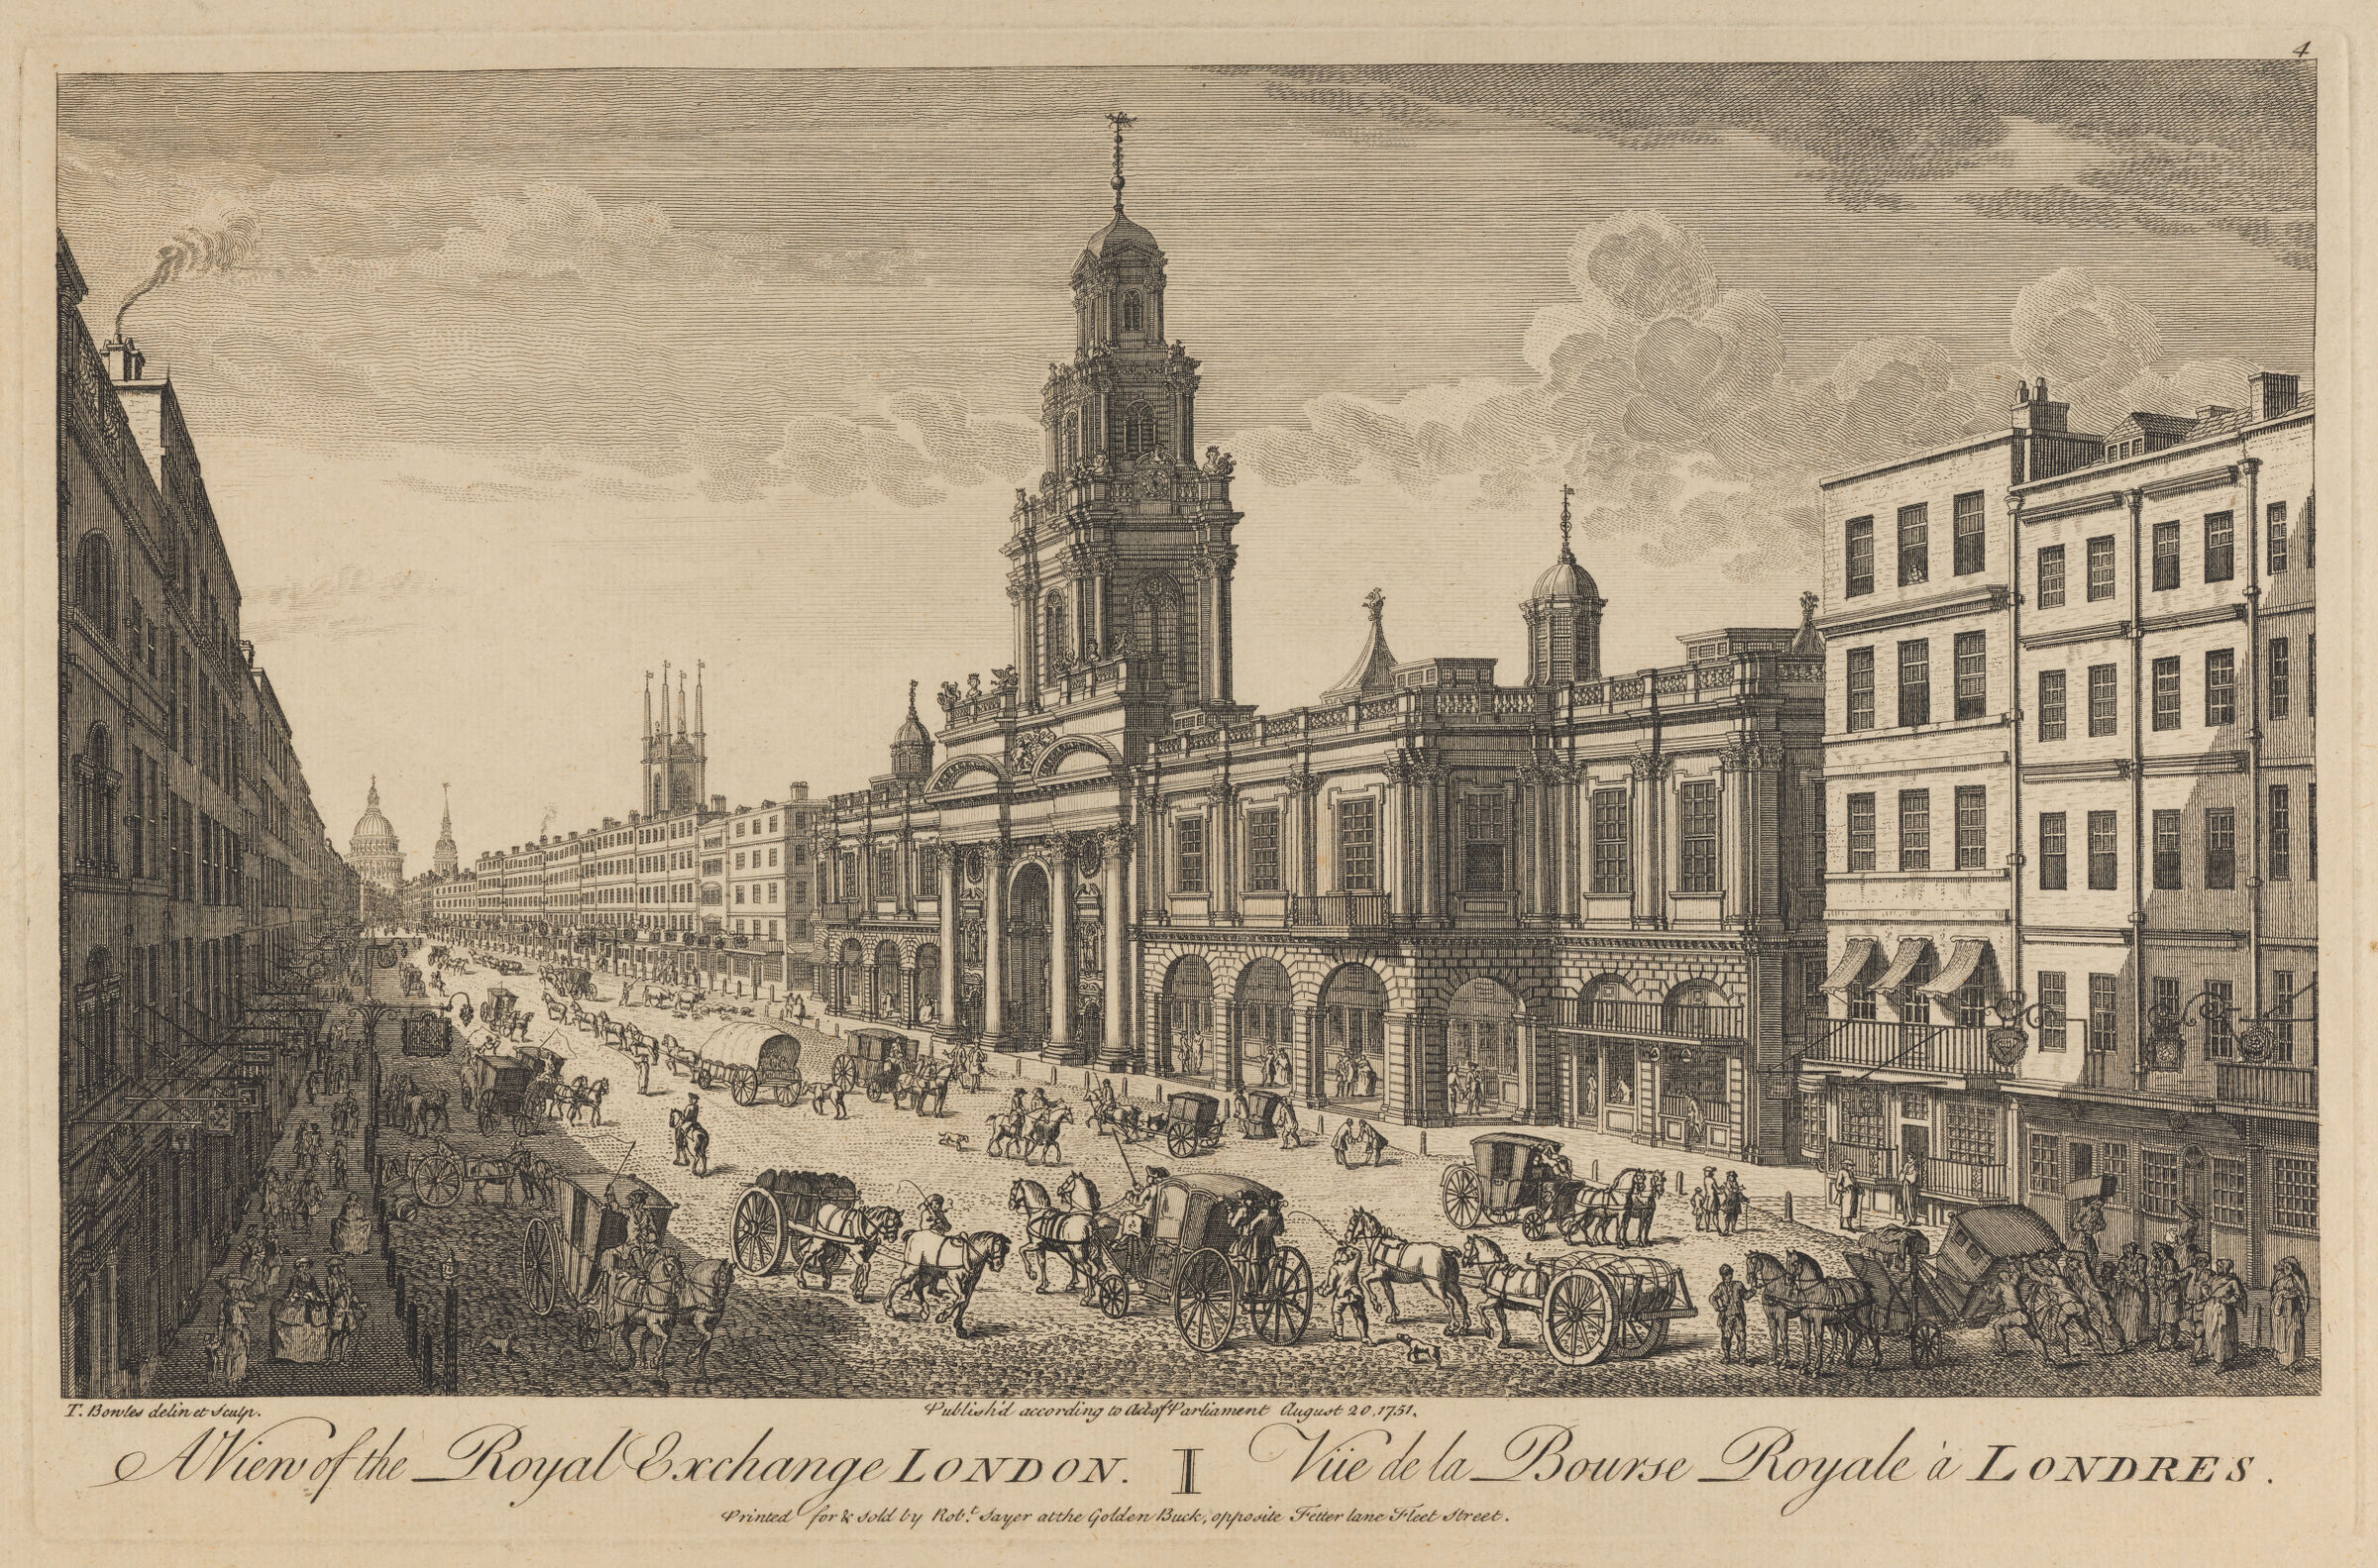

In [16]:
from IPython.display import Image, display, Audio, Markdown
import base64
from glob import glob

image_paths = glob("images/*.jpg") 
# Preview image for context
display(Image(image_paths[0]))

In [17]:
def load_image(inputs: dict) -> dict:
    """Load image from file and encode it as base64."""
    image_path = inputs["image_path"]

    def encode_image(image_path):
        with open(image_path, "rb") as image_file:
            return base64.b64encode(image_file.read()).decode('utf-8')
    image_base64 = encode_image(image_path)
    return {"image": image_base64}

In [18]:
from langchain.chains import TransformChain

load_image_chain = TransformChain(
    input_variables=["image_path"],
    output_variables=["image"],
    transform=load_image
)

## Define output structure

In [19]:
from pydantic import BaseModel, Field

class ImageInformation(BaseModel):
    """Information about an image."""
    image_description_short: str = Field(description="a short description of the image")
    image_description_long: str = Field(description="a long description of the image")
    image_text: str = Field(description="text contained in the image")
    people_count: int = Field(description="number of humans on the picture")
    main_objects: list[str] = Field(description="list of the main objects on the picture")

## Define image model

In [20]:
from langchain.chains import TransformChain
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from langchain import globals
from langchain_core.runnables import chain

# Set verbose
globals.set_debug(True)

@chain
def image_model(inputs: dict) -> str | list[str] | dict:
    """Invoke model with image and prompt."""
    model = ChatOpenAI(temperature=0.5, model="gpt-4o-2024-08-06", max_tokens=1024)
    msg = model.invoke(
        [HumanMessage(
            content=[
                {"type": "text", "text": inputs["prompt"]},
                {"type": "text", "text": parser.get_format_instructions()},
                {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{inputs['image']}"}},
            ])]
    )
    return msg.content

In [ ]:
import openai
from langsmith.wrappers import wrap_openai
from langsmith import traceable

# Auto-trace LLM calls in-context
client = wrap_openai(openai.Client())

@traceable # Auto-trace this function
def pipeline(user_input: str):
    result = client.chat.completions.create(
        messages=[{"role": "user", "content": user_input}],
        model="gpt-3.5-turbo"
    )
    return result.choices[0].message.content

pipeline("Hello, world!")
# Out:  Hello there! How can I assist you today?

In [38]:
# set the LANGCHAIN_API_KEY environment variable (create key in settings)
from langchain import prompts, chat_models, hub
prompt = hub.pull("hardkothari/prompt-maker")

lazy_prompt = """
   Given the image, provide the following information:
   - A count of how many people are in the image
   - A list of the main objects present in the image
   - A short description of the image, roughly a sentence long.
   - A long description of the image, roughly 5 sentences long.
   """

/Users/dkavlakoglu/DataspellProjects/coin-and-conscience/venv/lib/python3.12/site-packages/langsmith/client.py:323: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [ ]:
"""
HUMAN

Your goal is to improve the prompt given below for {task} :
    --------------------

Prompt: {lazy_prompt}

--------------------

Here are several tips on writing great prompts:

-------

Start the prompt by stating that it is an expert in the subject.

Put instructions at the beginning of the prompt and use ### or to separate the instruction and context 

Be specific, descriptive and as detailed as possible about the desired context, outcome, length, format, style, etc

---------

Here's an example of a great prompt:

As a master YouTube content creator, develop an engaging script that revolves around the theme of "Exploring Ancient Ruins."

Your script should encompass exciting discoveries, historical insights, and a sense of adventure.

Include a mix of on-screen narration, engaging visuals, and possibly interactions with co-hosts or experts.

The script should ideally result in a video of around 10-15 minutes, providing viewers with a captivating journey through the secrets of the past.

Example:

"Welcome back, fellow history enthusiasts, to our channel! Today, we embark on a thrilling expedition..."

-----

Now, improve the prompt.

IMPROVED PROMPT:

"""

In [7]:
from langchain_core.output_parsers import JsonOutputParser

parser = JsonOutputParser(pydantic_object=ImageInformation)
def get_image_informations(image_path: str) -> dict:
    vision_prompt = """
   Given the image, provide the following information:
   - A count of how many people are in the image
   - A list of the main objects present in the image
   - A short description of the image, roughly a sentence long.
   - A long description of the image, roughly 5 sentences long.
   """
    vision_chain = load_image_chain | image_model | parser
    return vision_chain.invoke({'image_path': f'{image_path}',
                                'prompt': vision_prompt})

## Test it out

In [8]:
result = get_image_informations(image_paths[0])
result_list = [result]
results_df = pd.DataFrame(result_list)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[llm/end] [chain:RunnableSequence > chain:image_model > llm:ChatOpenAI] [11.27s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "```json\n{\n  \"image_description_short\": \"An 18th-century engraving of the Royal Exchange in London.\",\n  \"image_description_long\": \"The image is an 18th-century engraving depicting a bustling scene in front of the Royal Exchange in London. The architecture of the Royal Exchange is prominently featured, showcasing its grand design with a central tower and symmetrical wings. The street is busy with horse-drawn carriages and numerous pedestrians, indicating a lively urban environment. In the background, other significant buildings and church spires are visible, contributing to the historical cityscape. The engraving captures the essence of London's commercial and architectural significance during this period.\",\n  \"image_text\": \"A View of the Royal Exchange London. Vue de la Bourse Royale à Londres.\",\n  \"people_cou

In [13]:
results_df

,image_description_short,image_description_long,image_text,people_count,main_objects
0,An 18th-century engraving of the Royal Exchang...,The image is an 18th-century engraving depicti...,A View of the Royal Exchange London. Vue de la...,20,"['Royal Exchange building', 'horse-drawn carri..."


In [11]:
results_df.to_csv('data/results.csv', index=False)

# Load images with Unstructured

In [39]:
from langchain_community.document_loaders import DirectoryLoader, UnstructuredImageLoader

unstructured_loader_kwargs = {"mode": "elements"}

image_loader = DirectoryLoader(
                                "images",
                                use_multithreading=True,
                                loader_cls=UnstructuredImageLoader,
                                loader_kwargs=unstructured_loader_kwargs,
                               )
image_docs = image_loader.load()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

## Load image captions

In [112]:
# create loaders
from langchain_community.document_loaders import ImageCaptionLoader

caption_loader = ImageCaptionLoader(images=image_list)
caption_docs = caption_loader.load()

## Load CSVs into Dataframes

In [ ]:
CC_df = pd.read_csv('data/coin_and_conscience_data.csv')
CC_augmented_df = pd.read_csv('data/coin_and_conscience_data_augmented.csv')
caption_df = pd.read_csv('data/caption.csv')
image_df = pd.read_csv('data/image.csv')
metadata_df = pd.read_csv('data/metadata.csv')

## Add metadata

In [53]:
# generate uuids for docs
from uuid import uuid4

caption_uuids = [str(uuid4()) for _ in range(len(caption_docs))]
image_uuids = [str(uuid4()) for _ in range(len(image_docs))]

In [113]:
# set caption uuids
for i in range(len(caption_uuids)):
    caption_docs[i].metadata["caption_id"] = caption_uuids[i]

In [59]:
# set image uuids
for i in range(len(image_uuids)):
    image_docs[i].metadata["image_id"] = image_uuids[i]

In [172]:
deduped = list(set(image_data_list))
print(len(deduped))

In [109]:
image_df = pd.DataFrame([doc.metadata for doc in image_docs])
image_df['page_content'] = [doc.page_content for doc in image_docs]
image_df = image_df.rename(columns = {'id':'image_id'})
image_df

,source,detection_class_prob,coordinates,last_modified,filetype,languages,page_number,file_directory,filename,category,element_id,image_id,parent_id,page_content
0,images/3910465.jpg,0.576225,"{'points': ((56.383705139160156, 30.0859451293...",2024-09-05T13:31:59,JPEG,[eng],1,images,3910465.jpg,Image,729517c31c1fda7fb4b1421e013363e4,7ba74431-d12b-41f8-b376-7f6203e23421,NaN,"RU YM Sie LM a Ye y eae AY) WML tr Y, ip A (2 ..."
1,images/3910465.jpg,NaN,"{'points': ((41.0, 1656.0), (41.0, 1725.0), (1...",2024-09-05T13:31:59,JPEG,[eng],1,images,3910465.jpg,Title,acde8ea5ea9959cf44cc23b03b82826c,4eb51154-ce39-41d5-af1d-377d24cb1c9a,NaN,",or__ The Old Lady of Thre -RAVISHMENT POLITICAL"
2,images/3910465.jpg,NaN,"{'points': ((1551.0, 1673.0), (1551.0, 1715.0)...",2024-09-05T13:31:59,JPEG,[eng],1,images,3910465.jpg,Title,0a9c36460e63e77042649cb22fe4fd86,ce008923-7c3c-480d-8c3e-c0b7aae8cb2a,NaN,i
3,images/3910511.jpg,0.768353,"{'points': ((32.92207717895508, 52.47631072998...",2024-09-05T13:32:11,JPEG,[eng],1,images,3910511.jpg,Image,fb8d7bb70fdcf26ed4a1018c3cf28e39,49f68ac6-b73a-48b5-b13b-9007b845eeb1,NaN,Vullishd according to tityf$a aaa Bugust 2 20....
4,images/3910511.jpg,NaN,"{'points': ((101.0, 1430.0), (101.0, 1526.0), ...",2024-09-05T13:32:11,JPEG,[eng],1,images,3910511.jpg,Title,4d550873a45fac128e996a52b424464a,1774bd45-dace-4987-9717-d2ea1560dee2,NaN,"Pe Ly, View of t Me Kioyal Carituange"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,images/3910535.jpg,NaN,"{'points': ((1137.5757575757577, 1762.72727272...",2024-09-05T13:31:41,JPEG,[eng],1,images,3910535.jpg,Title,18c88d6963df67ecd235f79dd1fa046a,f1799062-43f1-4d0d-8185-7298c5f8ed4e,NaN,§ cognitus
436,images/3910535.jpg,NaN,"{'points': ((1388.7878787878788, 1769.09090909...",2024-09-05T13:31:41,JPEG,[eng],1,images,3910535.jpg,Title,0285e11edd2e54a702086af8a0cacad7,1cf1ccec-1131-4f50-b641-50b4c645a8e3,NaN,Vjus
437,images/3910535.jpg,NaN,"{'points': ((1527.5757575757577, 1767.87878787...",2024-09-05T13:31:41,JPEG,[eng],1,images,3910535.jpg,Title,e6458223e6e8c0ad70e13f92afcf2ca7,4341a2b8-f249-48d7-a0e9-bd795de18a6b,NaN,Pull: OO
438,images/3910535.jpg,NaN,"{'points': ((1656.969696969697, 1781.212121212...",2024-09-05T13:31:41,JPEG,[eng],1,images,3910535.jpg,Title,62dac22f6bb51a3ece4fd0fbe5cef94c,9968dbf0-8a9e-4944-aff2-e1465a951606,NaN,eA


In [114]:
caption_df = pd.DataFrame([doc.metadata for doc in caption_docs])
caption_df['caption_text'] = [doc.page_content for doc in caption_docs]
# caption_df.rename(columns = {'page_content':'caption_text'})
caption_df

,image_path,caption_id,caption_text
0,images/3910511.jpg,4bde0737-f255-4a68-b57a-497321b99c64,an image of a city street with a horse drawn [...
1,images/3910539.jpg,be50790a-d58e-4780-a8b4-b07576a8ecb5,an image of a group of people in a courtyard [...
2,images/3910471.jpg,c3dde9af-acc5-4f87-b26c-e9a83e4bddde,an image of a man in a coat and hat [SEP]
3,images/3910465.jpg,959f2724-57c1-49d7-ba06-90648de460a2,an image of a cartoon of a man and woman [SEP]
4,images/3910459.jpg,9ea540da-eb9b-4f06-aedc-8943e9f5cce6,an image of a nude woman lying on a bed [SEP]
...,...,...,...
65,images/3910521.jpg,b29d8367-8ffc-4723-b4b5-a3c977922af5,an image of a man being taken from a manger [SEP]
66,images/3910535.jpg,c2eb6a58-7b63-4f24-9960-318a4d1d1bf1,an image of a man in a suit and hat [SEP]
67,images/3910469.jpg,2f72c100-cd7b-47c1-995b-6a5ac64cf7d5,an image of a city with a clock tower [SEP]
68,images/3910455.jpg,142476fa-a210-43de-9295-09056260dd42,an image of two men standing next to each othe...


In [161]:
caption_df['base64_encoding'] = image_data_list
caption_df

,image_path,caption_id,caption_text,base64_encoding
0,images/3910511.jpg,4bde0737-f255-4a68-b57a-497321b99c64,an image of a city street with a horse drawn [...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAYEBQYFBAYGBQ...
1,images/3910539.jpg,be50790a-d58e-4780-a8b4-b07576a8ecb5,an image of a group of people in a courtyard [...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAYEBQYFBAYGBQ...
2,images/3910471.jpg,c3dde9af-acc5-4f87-b26c-e9a83e4bddde,an image of a man in a coat and hat [SEP],/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAYEBQYFBAYGBQ...
3,images/3910465.jpg,959f2724-57c1-49d7-ba06-90648de460a2,an image of a cartoon of a man and woman [SEP],/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAYEBQYFBAYGBQ...
4,images/3910459.jpg,9ea540da-eb9b-4f06-aedc-8943e9f5cce6,an image of a nude woman lying on a bed [SEP],/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAYEBQYFBAYGBQ...
...,...,...,...,...
65,images/3910521.jpg,b29d8367-8ffc-4723-b4b5-a3c977922af5,an image of a man being taken from a manger [SEP],/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAYEBQYFBAYGBQ...
66,images/3910535.jpg,c2eb6a58-7b63-4f24-9960-318a4d1d1bf1,an image of a man in a suit and hat [SEP],/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAYEBQYFBAYGBQ...
67,images/3910469.jpg,2f72c100-cd7b-47c1-995b-6a5ac64cf7d5,an image of a city with a clock tower [SEP],/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAYEBQYFBAYGBQ...
68,images/3910455.jpg,142476fa-a210-43de-9295-09056260dd42,an image of two men standing next to each othe...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAYEBQYFBAYGBQ...


In [124]:
# initialize vectorstore and load docs
from langchain_chroma import Chroma
from langchain_ollama import OllamaEmbeddings

vectorstore = Chroma.from_documents(documents=caption_docs, embedding=OllamaEmbeddings(model="llama3.1"))

retriever = vectorstore.as_retriever(k=10)

In [125]:
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate
from langchain_ollama import ChatOllama

model = ChatOllama(model="llama3.1", temperature=0)

system_prompt = (
    "You are an assistant for question-answering tasks. "
    "Use the following pieces of retrieved context to answer "
    "the question. If you don't know the answer, say that you "
    "don't know. Use three sentences maximum and keep the "
    "answer concise."
    "\n\n"
    "{context}"
)

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("human", "{input}"),
    ]
)


question_answer_chain = create_stuff_documents_chain(model, prompt)
rag_chain = create_retrieval_chain(retriever, question_answer_chain)


In [128]:
results = retriever.invoke(query)
print(results)

[Document(metadata={'caption_id': 'cc7d63b1-d890-488e-99f4-d1721a0d591d', 'image_path': 'images/3910457.jpg'}, page_content='an image of a woman in a dress and a man in a hat on a horse [SEP]'), Document(metadata={'caption_id': 'cc7d63b1-d890-488e-99f4-d1721a0d591d', 'image_path': 'images/3910457.jpg'}, page_content='an image of a woman in a dress and a man in a hat on a horse [SEP]'), Document(metadata={'caption_id': 'cc7d63b1-d890-488e-99f4-d1721a0d591d', 'image_path': 'images/3910457.jpg'}, page_content='an image of a woman in a dress and a man in a hat on a horse [SEP]'), Document(metadata={'caption_id': '9ea540da-eb9b-4f06-aedc-8943e9f5cce6', 'image_path': 'images/3910459.jpg'}, page_content='an image of a nude woman lying on a bed [SEP]')]


In [126]:
query = "Which captions mention people?"

response = rag_chain.invoke({"input": query})

print(response["answer"])

The first three images mention people, as they describe a woman and a man. The fourth image does not mention people.


In [159]:
caption_df.to_csv('data/caption.csv', index=False))

In [160]:
image_df.to_csv('data/image.csv', index=False))